In [1]:
import numpy as np
import pandas as pd

########################SET folder to path of code directory in the project folder#####################
## SET PATH to code directory in the project folder
code_path = ""
import sys  
sys.path.insert(1, code_path)

########################SET folder to project directory path#####################
folder= ""

from utils.data_loading import get_feedback, get_feedback_df

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Data Loading

In [2]:
## LOAD FEEDBACK
prolific_export_filePath = folder+"data\\collected_data\\prolific_export_demographics.xlsx"
interaction_logs_filePath = folder+"data\\collected_data\\LOGS\\interactions\\"
feedback_df = get_feedback_df(prolific_export_filePath, interaction_logs_filePath)
#feedback_df.to_csv("Feedback_final.csv")

23


In [3]:
## LOAD APPLICATIONS SHOWN TO PARTICIPANTS
applications_df = pd.read_csv(folder+"data\\processed_data\\Applications.csv")
ft_weight_dict = {}

for i in range(0,49):
    ft_weight_dict.update({applications_df["ft_name_"+ str(i)][0]:applications_df["ft_weight_"+ str(i)][0]})

## Average number of clicks that a user did on a function with std

In [4]:
function_group = feedback_df.groupby(by = ["ID","Function"])

function_count = function_group.size().unstack(fill_value=0).stack()

parti_list = []
function_list = []
function_count_list = function_count.tolist()

# print(len(function_count_list))

for i in range(0,len(function_count.index)):
    parti_list.append(function_count.index[i][0])
    function_list.append(function_count.index[i][1])

parti_func_df = pd.DataFrame()

parti_func_df["Participant"] = parti_list
parti_func_df["Function"] = function_list
parti_func_df["Participant_Function_Count"] = function_count_list
parti_func_df

,Participant,Function,Participant_Function_Count
0,55c333b0fdf99b1dbd2131bd,APPLICATIONROW_CLICKED_Applications_List,14
1,55c333b0fdf99b1dbd2131bd,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,16
2,55c333b0fdf99b1dbd2131bd,REVERTBUTTON_CLICKED,0
3,55c333b0fdf99b1dbd2131bd,SELECT_ATTRIBUTES_Fairness_Metrics,0
4,55c333b0fdf99b1dbd2131bd,SORTING_CLICKED_Application_Detail_Attribute,0
...,...,...,...
721,654d4401d386722f1c6bddf1,SORTING_CLICKED_Applications_List_Fairness,0
722,654d4401d386722f1c6bddf1,SORTING_CLICKED_Applications_List_Predicted De...,2
723,654d4401d386722f1c6bddf1,SORTING_CLICKED_Applications_List_Prediction C...,1
724,654d4401d386722f1c6bddf1,SORTING_CLICKED_Fairness_Metrics_Attribute,0


In [5]:
data = []

for func in parti_func_df["Function"].unique():
    
    data.append(
    {
        "Function" : func,
        "Total" : parti_func_df[parti_func_df["Function"]== func ].Participant_Function_Count.sum(),
        "Mean": round(parti_func_df[parti_func_df["Function"]== func ].Participant_Function_Count.mean(),2),
        "Std": round(parti_func_df[parti_func_df["Function"]== func ].Participant_Function_Count.std(),2),
        "Number of Participants Clicked" : parti_func_df[(parti_func_df["Function"]== func) & (parti_func_df["Participant_Function_Count"] != 0)].shape[0]
    }
    )
    
each_function_df = pd.DataFrame(data)
each_function_df.sort_values(by='Total', ascending=False, inplace = True)
each_function_df.reset_index(drop = True, inplace = True)
each_function_df

each_function_df.replace({'Function' : { "APPLICATIONROW_CLICKED_Applications_List" :'Select an application in APPs table', 
                                        "OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List" : 'Give rating and weight',
                                        "apply_refine_search":"Filter for an attribute in APPs table",
                                       "SORTING_CLICKED_Applications_List_Prediction Confidence": "Sort for prediction confidence in APPs table",
                                        "SORTING_CLICKED_Applications_List_Predicted Decision": "Sort for predicted decision in APPs table", 
                                        "SORTING_CLICKED_Application_Detail_Weight": "Sort for weight in App Detail table", 
                                        "SORTING_CLICKED_Fairness_Metrics_Attribute": "Sort for attribute in Fairness Metrics table", 
                                        "SORTING_CLICKED_Application_Detail_Attribute": "Sort for attribute in App Detail table",
                                        "SORTING_CLICKED_Applications_List_Fairness": "Sort for fairness in APPs table",
                                        "SELECT_ATTRIBUTES_Fairness_Metrics": "Select attributes to view in Fairness Metrics table",
                                       "REVERTBUTTON_CLICKED": "Revert last feedback"}},inplace=True)

each_function_df

,Function,Total,Mean,Std,Number of Participants Clicked
0,Give rating and weight,1544,23.39,15.23,66
1,Select an application in APPs table,667,10.11,17.28,51
2,Filter for an attribute in APPs table,139,2.11,3.42,30
3,Sort for predicted decision in APPs table,50,0.76,1.63,21
4,Sort for attribute in Fairness Metrics table,24,0.36,1.12,8
5,Sort for prediction confidence in APPs table,17,0.26,1.15,4
6,Sort for weight in App Detail table,13,0.20,0.93,5
7,Revert last feedback,11,0.17,0.48,8
8,Select attributes to view in Fairness Metrics ...,8,0.12,0.41,6
9,Sort for attribute in App Detail table,4,0.06,0.39,2


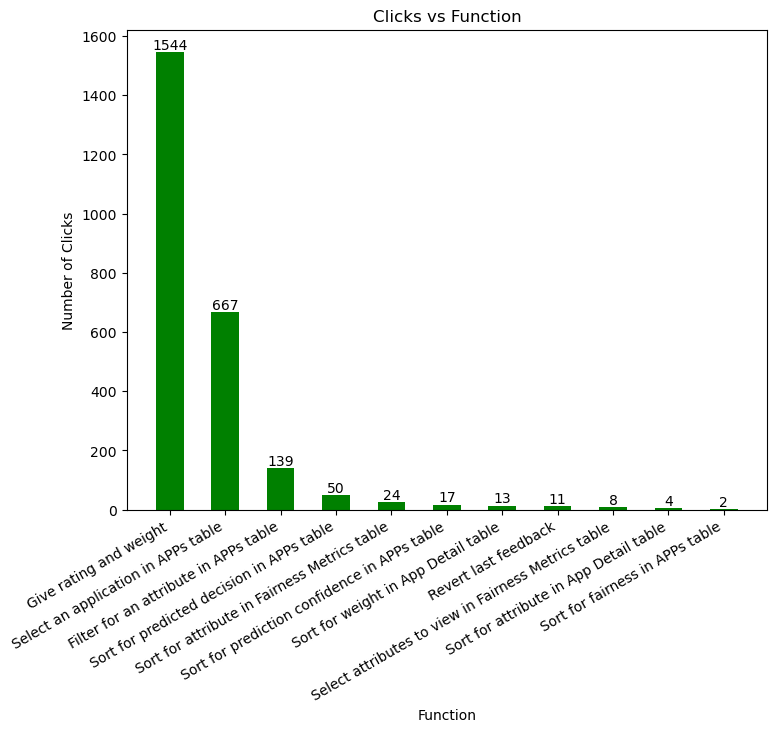

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


bars = ax.bar(each_function_df["Function"],each_function_df["Total"], width=0.5, color = "green")
ax.bar_label(bars)
plt.title("Clicks vs Function")
plt.xlabel('Function')
plt.ylabel('Number of Clicks')
fig.autofmt_xdate()
plt.show()

## How many times each application was viewed w.r.t each user

In [7]:
feedback_df[feedback_df["Function"] == "APPLICATIONROW_CLICKED_Applications_List"]

display(feedback_df[feedback_df["Function"] == "APPLICATIONROW_CLICKED_Applications_List"].head())
print(feedback_df[feedback_df["Function"] == "APPLICATIONROW_CLICKED_Applications_List"]["ID"].nunique())

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
0,3,2023-11-10 11:58:42.923967,60c442aafa8afba1988e2ba0,140135,APPLICATIONROW_CLICKED_Applications_List,NaN,140135,NaN,NaN
11,14,2023-11-10 12:09:20.966000,60c442aafa8afba1988e2ba0,287940,APPLICATIONROW_CLICKED_Applications_List,NaN,287940,NaN,NaN
12,15,2023-11-10 12:09:21.490273,60c442aafa8afba1988e2ba0,259225,APPLICATIONROW_CLICKED_Applications_List,NaN,259225,NaN,NaN
15,18,2023-11-10 12:14:07.847364,60c442aafa8afba1988e2ba0,421722,APPLICATIONROW_CLICKED_Applications_List,NaN,421722,NaN,NaN
17,20,2023-11-10 12:15:26.945437,60c442aafa8afba1988e2ba0,259293,APPLICATIONROW_CLICKED_Applications_List,NaN,259293,NaN,NaN


51


In [8]:
app_group = feedback_df[feedback_df["Function"] == "APPLICATIONROW_CLICKED_Applications_List"].groupby(by = ["ID","App ID"])

app_count = app_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(app_count.index)):    
    data.append(
    {
        "Participant" : app_count.index[i][0],
        "App ID" : app_count.index[i][1],
        "Count": app_count.values[i]
    }
    )
    
parti_app_df = pd.DataFrame(data)
parti_app_df

,Participant,App ID,Count
0,55c333b0fdf99b1dbd2131bd,102569,0
1,55c333b0fdf99b1dbd2131bd,120323,0
2,55c333b0fdf99b1dbd2131bd,120401,0
3,55c333b0fdf99b1dbd2131bd,124707,0
4,55c333b0fdf99b1dbd2131bd,135162,0
...,...,...,...
4432,654d4401d386722f1c6bddf1,427794,0
4433,654d4401d386722f1c6bddf1,440137,0
4434,654d4401d386722f1c6bddf1,447461,0
4435,654d4401d386722f1c6bddf1,452591,0


In [9]:
data = []

for app_id in parti_app_df["App ID"].unique():    
    data.append(
    {
        "Application" : app_id,
        "Total" : parti_app_df[parti_app_df["App ID"]== app_id ].Count.sum(),
        "Mean": round(parti_app_df[parti_app_df["App ID"]== app_id ].Count.mean(),2),
        "Std": round(parti_app_df[parti_app_df["App ID"]== app_id ].Count.std(),2),
        "Number of Participants Viewed" : parti_app_df[(parti_app_df["App ID"]== app_id) & (parti_app_df["Count"] != 0)].shape[0]
    }
    )
    
each_app_df = pd.DataFrame(data)
each_app_df

each_app_df.sort_values(by='Total', ascending=False, inplace = True)
each_app_df.fillna("NA", inplace = True)
each_app_df.reset_index(drop = True, inplace = True)
each_app_df

each_app_df.to_csv("How many times each application was viewed w.r.t each user.csv")

## Which attribute was most filtered for w.r.t each participant

In [10]:
feedback_df[feedback_df["Function"] == "apply_refine_search"]

display(feedback_df[feedback_df["Function"] == "apply_refine_search"].head())
print(feedback_df[feedback_df["Function"] == "apply_refine_search"]["ID"].nunique())

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
1,4,2023-11-10 12:00:33.930728,60c442aafa8afba1988e2ba0,0,apply_refine_search,Family status,Married,NaN,NaN
2,5,2023-11-10 12:00:40.430279,60c442aafa8afba1988e2ba0,0,apply_refine_search,Family status,Single / not married,NaN,NaN
3,6,2023-11-10 12:00:41.753218,60c442aafa8afba1988e2ba0,0,apply_refine_search,Family status,Single / not married,NaN,NaN
69,4,2023-11-10 11:52:59.880919,5f047d44d191116edb3cb798,0,apply_refine_search,Gender,Female,NaN,NaN
71,6,2023-11-10 11:53:13.338586,5f047d44d191116edb3cb798,0,apply_refine_search,sdf,No Filter,NaN,NaN


30


In [11]:
attribute_group = feedback_df.groupby(by = ["ID","Attribute"])

attribute_count = attribute_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(attribute_count.index)):
    
    if attribute_count.index[i][1] in list(ft_weight_dict.keys()):
        data.append(
        {
            "Participant" : attribute_count.index[i][0],
            "Attribute" : attribute_count.index[i][1],
            "Count": attribute_count.values[i]
        }
        )
    
parti_attri_df = pd.DataFrame(data)
parti_attri_df

,Participant,Attribute,Count
0,55c333b0fdf99b1dbd2131bd,Accompanied while applying,0
1,55c333b0fdf99b1dbd2131bd,Age,0
2,55c333b0fdf99b1dbd2131bd,Application Day,0
3,55c333b0fdf99b1dbd2131bd,Application Hour,0
4,55c333b0fdf99b1dbd2131bd,Contact city in work city,0
...,...,...,...
1117,654d4401d386722f1c6bddf1,Loan Credit amount,0
1118,654d4401d386722f1c6bddf1,Number of children,0
1119,654d4401d386722f1c6bddf1,Number of times social circle defaulted on loa...,0
1120,654d4401d386722f1c6bddf1,Owns Car,0


In [12]:
data = []

for attribute in list(ft_weight_dict.keys()):
    
    data.append(
    {
        "Attribute" : attribute,
        "Total" : parti_attri_df[parti_attri_df["Attribute"]== attribute ].Count.sum(),
        "Mean": round(parti_attri_df[parti_attri_df["Attribute"]== attribute ].Count.mean(),2),
        "Std": round(parti_attri_df[parti_attri_df["Attribute"]== attribute ].Count.std(),2),
        "Number of Participants Filtered" : parti_attri_df[(parti_attri_df["Attribute"]== attribute) & (parti_attri_df["Count"] != 0)].shape[0]
    }
    )
    
each_attri_df = pd.DataFrame(data)
each_attri_df

each_attri_df.sort_values(by='Total', ascending=False, inplace = True)
each_attri_df.fillna("NA", inplace = True)
each_attri_df.reset_index(drop = True, inplace = True)
each_attri_df
# each_attri_df.to_csv("Attribute was most filtered for w.r.t each participant.csv")

,Attribute,Total,Mean,Std,Number of Participants Filtered
0,Age,47,0.71,1.82,18
1,Gender,20,0.3,0.89,11
2,Income,16,0.24,1.15,7
3,Family status,11,0.17,0.6,6
4,Accompanied while applying,9,0.14,0.49,6
5,Highest education level,6,0.09,0.52,3
6,Loan Credit amount,4,0.06,0.24,4
7,Number of children,3,0.05,0.21,3
8,Has Mobile,3,0.05,0.27,2
9,Employer organization,3,0.05,0.37,1


## Applications_Prediction_Confidence : Ascended or Descended w.r.t each User

In [ ]:
# feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Applications_List_Prediction Confidence"]

In [13]:
pc_group= feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Applications_List_Prediction Confidence"].groupby(by = ["ID","Value"])

pc_count = pc_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(pc_count.index)):
    
    data.append(
    {
        "Participant" : pc_count.index[i][0],
        "PC_Value" : pc_count.index[i][1],
        "Count": pc_count.values[i]
    }
    )
    
parti_pc_df = pd.DataFrame(data)
parti_pc_df

,Participant,PC_Value,Count
0,5fdb9ccbe6b281016f79a732,ascend,2
1,5fdb9ccbe6b281016f79a732,descend,1
2,60b7bb77c573c1a28d072811,ascend,3
3,60b7bb77c573c1a28d072811,descend,2
4,61183bece4c3e63512e3eb5d,ascend,2
5,61183bece4c3e63512e3eb5d,descend,2
6,654d4401d386722f1c6bddf1,ascend,1
7,654d4401d386722f1c6bddf1,descend,0


In [14]:
data = []

for pc_action in feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Applications_List_Prediction Confidence"]["Value"].unique():
    
    data.append(
    {
        "PC_Value" : pc_action,
        "Total" : parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.sum(),
        "Mean": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.mean(),2),
        "Std": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.std(),2),
        "Number of Participants Clicked" : parti_pc_df[(parti_pc_df["PC_Value"]== pc_action) & (parti_pc_df["Count"] != 0)].shape[0]
    }
    )
    
each_pc_df = pd.DataFrame(data)

each_pc_df.sort_values(by='Total', ascending=False, inplace = True)
each_pc_df.fillna("NA", inplace = True)
each_pc_df.reset_index(drop = True, inplace = True)
display(each_pc_df)

,PC_Value,Total,Mean,Std,Number of Participants Clicked
0,ascend,8,2.0,0.82,4
1,descend,5,1.25,0.96,3
2,NA,0,NA,NA,0


## Applications Predicted Decision : Ascended or Descended w.r.t each User

In [ ]:
pc_group= feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Applications_List_Predicted Decision"].groupby(by = ["ID","Value"])

pc_count = pc_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(pc_count.index)):
    
    data.append(
    {
        "Participant" : pc_count.index[i][0],
        "PC_Value" : pc_count.index[i][1],
        "Count": pc_count.values[i]
    }
    )
    
parti_pc_df = pd.DataFrame(data)
parti_pc_df

In [ ]:
data = []

for pc_action in feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Applications_List_Predicted Decision"]["Value"].unique():
    
    data.append(
    {
        "PC_Value" : pc_action,
        "Total" : parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.sum(),
        "Mean": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.mean(),2),
        "Std": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.std(),2),
        "Number of Participants Clicked" : parti_pc_df[(parti_pc_df["PC_Value"]== pc_action) & (parti_pc_df["Count"] != 0)].shape[0]
    }
    )
    
each_pc_df = pd.DataFrame(data)

each_pc_df.sort_values(by='Total', ascending=False, inplace = True)
each_pc_df.fillna("NA", inplace = True)
each_pc_df.reset_index(drop = True, inplace = True)
display(each_pc_df)

## Attribute in Fairness Metrics Table : Ascended or Descended w.r.t each participant

In [ ]:
pc_group= feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Fairness_Metrics_Attribute"].groupby(by = ["ID","Value"])

pc_count = pc_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(pc_count.index)):
    
    data.append(
    {
        "Participant" : pc_count.index[i][0],
        "PC_Value" : pc_count.index[i][1],
        "Count": pc_count.values[i]
    }
    )
    
parti_pc_df = pd.DataFrame(data)
parti_pc_df

In [ ]:
data = []

for pc_action in feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Fairness_Metrics_Attribute"]["Value"].unique():
    
    data.append(
    {
        "PC_Value" : pc_action,
        "Total" : parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.sum(),
        "Mean": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.mean(),2),
        "Std": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.std(),2),
        "Number of Participants Clicked" : parti_pc_df[(parti_pc_df["PC_Value"]== pc_action) & (parti_pc_df["Count"] != 0)].shape[0]
    }
    )
    
each_pc_df = pd.DataFrame(data)

each_pc_df.sort_values(by='Total', ascending=False, inplace = True)
each_pc_df.fillna("NA", inplace = True)
each_pc_df.reset_index(drop = True, inplace = True)
display(each_pc_df)

## Weight in App Detail Table : Ascended or Descended w.r.t each participant

In [ ]:
pc_group= feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Application_Detail_Weight"].groupby(by = ["ID","Value"])

pc_count = pc_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(pc_count.index)):
    
    data.append(
    {
        "Participant" : pc_count.index[i][0],
        "PC_Value" : pc_count.index[i][1],
        "Count": pc_count.values[i]
    }
    )
    
parti_pc_df = pd.DataFrame(data)
parti_pc_df

In [ ]:
data = []

for pc_action in feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Application_Detail_Weight"]["Value"].unique():
    
    data.append(
    {
        "PC_Value" : pc_action,
        "Total" : parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.sum(),
        "Mean": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.mean(),2),
        "Std": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.std(),2),
        "Number of Participants Clicked" : parti_pc_df[(parti_pc_df["PC_Value"]== pc_action) & (parti_pc_df["Count"] != 0)].shape[0]
    }
    )
    
each_pc_df = pd.DataFrame(data)

each_pc_df.sort_values(by='Total', ascending=False, inplace = True)
each_pc_df.fillna("NA", inplace = True)
each_pc_df.reset_index(drop = True, inplace = True)
display(each_pc_df)


## Attribute in App Detail Table : Ascended or Descended w.r.t each participant

In [ ]:
feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Application_Detail_Attribute"]

In [ ]:
pc_group= feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Application_Detail_Attribute"].groupby(by = ["ID","Value"])

pc_count = pc_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(pc_count.index)):
    
    data.append(
    {
        "Participant" : pc_count.index[i][0],
        "PC_Value" : pc_count.index[i][1],
        "Count": pc_count.values[i]
    }
    )
    
parti_pc_df = pd.DataFrame(data)
parti_pc_df

In [ ]:
data = []

for pc_action in feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Application_Detail_Attribute"]["Value"].unique():
    
    data.append(
    {
        "PC_Value" : pc_action,
        "Total" : parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.sum(),
        "Mean": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.mean(),2),
        "Std": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.std(),2),
        "Number of Participants Clicked" : parti_pc_df[(parti_pc_df["PC_Value"]== pc_action) & (parti_pc_df["Count"] != 0)].shape[0]
    }
    )
    
each_pc_df = pd.DataFrame(data)

each_pc_df.sort_values(by='Total', ascending=False, inplace = True)
each_pc_df.fillna("NA", inplace = True)
each_pc_df.reset_index(drop = True, inplace = True)
display(each_pc_df)

## Fairness in Apps Table : Ascended or Descended w.r.t each participant

In [ ]:
feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Applications_List_Fairness"]

In [ ]:
pc_group= feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Applications_List_Fairness"].groupby(by = ["ID","Value"])

pc_count = pc_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(pc_count.index)):
    
    data.append(
    {
        "Participant" : pc_count.index[i][0],
        "PC_Value" : pc_count.index[i][1],
        "Count": pc_count.values[i]
    }
    )
    
parti_pc_df = pd.DataFrame(data)
parti_pc_df

In [ ]:
data = []

for pc_action in feedback_df[feedback_df["Function"] == "SORTING_CLICKED_Applications_List_Fairness"]["Value"].unique():
    
    data.append(
    {
        "PC_Value" : pc_action,
        "Total" : parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.sum(),
        "Mean": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.mean(),2),
        "Std": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.std(),2),
        "Number of Participants Clicked" : parti_pc_df[(parti_pc_df["PC_Value"]== pc_action) & (parti_pc_df["Count"] != 0)].shape[0]
    }
    )
    
each_pc_df = pd.DataFrame(data)

each_pc_df.sort_values(by='Total', ascending=False, inplace = True)
each_pc_df.fillna("NA", inplace = True)
each_pc_df.reset_index(drop = True, inplace = True)
display(each_pc_df)


# Did all participants always view 3 protected attributes

In [13]:
import ast
for v in feedback_df[feedback_df['Function']=='SELECT_ATTRIBUTES_Fairness_Metrics']['Value']:
    v_= ast.literal_eval(v)
    missing_protected_attr = []
    if 'Age' not in v_:
        missing_protected_attr.append('Age')
    if 'Gender' not in v_:
        missing_protected_attr.append('Gender')
    if 'Family status' not in v_:
        missing_protected_attr.append('Family status')
    if len(missing_protected_attr):
        print(feedback_df[feedback_df['Value']==v]['ID'].tolist(),missing_protected_attr)

['65046ab60ee62c5c2a6d8463'] ['Age']
['61267b828ead584bcf092e35'] ['Family status']


# Which attributes participants selected to view in fairness Metrics table

In [ ]:
feedback_df[feedback_df["Function"] == "SELECT_ATTRIBUTES_Fairness_Metrics"]

In [ ]:
import ast
import json
select_attr = feedback_df[feedback_df["Function"] == "SELECT_ATTRIBUTES_Fairness_Metrics"]
ast.literal_eval(select_attr[select_attr['ID']=='63ced242b56ce9d796f4398b']['Value'].values.tolist()[0])

attrs_count_dict={}
attrs_part_dict = {}
attrs_previous = []
for p_id in select_attr['ID'].unique():
    p_select_attr = select_attr[select_attr['ID']==p_id]
    for i,time in enumerate(p_select_attr['timestamp'].values.tolist()):
        attrs = ast.literal_eval(p_select_attr[p_select_attr['timestamp']==time]['Value'].values.tolist()[0])
        for attr in attrs:
            if attr == 'Age' or attr == 'Gender' or attr=='Family status' or attr in attrs_previous:
                continue
            if attr not in attrs_count_dict:
                attrs_count_dict[attr] = 1
                attrs_part_dict[attr]= [p_id]
            else:
                attrs_count_dict[attr] = attrs_count_dict[attr] + 1
                if p_id not in attrs_part_dict[attr]:
                    attrs_part_dict[attr].append(p_id)
        attrs_previous = ast.literal_eval(p_select_attr[p_select_attr['timestamp']==time]['Value'].values.tolist()[0])
attrs_count_dict

for attr in attrs_part_dict:
    attrs_part_dict[attr] = len(attrs_part_dict[attr])
    
attrs_count_df = pd.DataFrame({'Attribute':list(attrs_count_dict.keys()),
                               'Total_Attribute_Selections':list(attrs_count_dict.values()),
                               'Number of Participants Clicked':list(attrs_part_dict.values())})
attrs_count_df.sort_values(by='Total_Attribute_Selections', ascending=False, inplace = True)
attrs_count_df.fillna("NA", inplace = True)
attrs_count_df.reset_index(drop = True, inplace = True)
attrs_count_df

In [ ]:
select_attr['ID'].unique()

# How many times the revert button was clicked?

In [5]:
rev_df = feedback_df[feedback_df["Function"]=="REVERTBUTTON_CLICKED"] ## 11
rev_df

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
478,60,2023-11-10 15:33:33.181193,5fdb9ccbe6b281016f79a732,124707,REVERTBUTTON_CLICKED,NaN,NaN,0.0,0.0
483,65,2023-11-10 15:34:24.665125,5fdb9ccbe6b281016f79a732,380727,REVERTBUTTON_CLICKED,NaN,NaN,0.0,0.0
1121,16,2023-11-10 17:39:13.283425,6505e1d7baa4d89f7a2f3b53,140328,REVERTBUTTON_CLICKED,NaN,NaN,0.0,0.0
1473,13,2023-11-10 17:49:02.981252,608ab7f46594ee2bcc835f69,140135,REVERTBUTTON_CLICKED,NaN,NaN,0.0,0.0
1489,29,2023-11-10 17:55:02.014997,608ab7f46594ee2bcc835f69,447461,REVERTBUTTON_CLICKED,NaN,NaN,0.0,0.0
1535,11,2023-11-10 18:13:46.892185,65257c1a7780ceee7f6ef9bd,447461,REVERTBUTTON_CLICKED,NaN,NaN,0.0,0.0
1936,8,2023-11-16 14:15:33.972490,5b3f242f9c2ec600014ef9fc,120401,REVERTBUTTON_CLICKED,NaN,NaN,0.0,0.0
2187,19,2023-11-16 14:31:51.794131,65215a6b71c92df9d8c659ea,146414,REVERTBUTTON_CLICKED,NaN,NaN,0.0,0.0
2236,37,2023-11-17 12:40:54.896335,5be1c7de91deed00015a97b9,211610,REVERTBUTTON_CLICKED,NaN,NaN,0.0,0.0
2453,6,2023-11-17 12:45:37.211977,5ad63c167f70c10001904bc5,140135,REVERTBUTTON_CLICKED,NaN,NaN,0.0,0.0


In [6]:
part_num_reverts = {}
for p in rev_df['ID'].unique():
    part_num_reverts[p] = len(rev_df[rev_df['ID']==p])
part_num_reverts

{'5fdb9ccbe6b281016f79a732': 2,
 '6505e1d7baa4d89f7a2f3b53': 1,
 '608ab7f46594ee2bcc835f69': 2,
 '65257c1a7780ceee7f6ef9bd': 1,
 '5b3f242f9c2ec600014ef9fc': 1,
 '65215a6b71c92df9d8c659ea': 1,
 '5be1c7de91deed00015a97b9': 1,
 '5ad63c167f70c10001904bc5': 2}

In [11]:
ok_rev_df = feedback_df[feedback_df["Function"].isin(["REVERTBUTTON_CLICKED","OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List"]) ]
ok_rev_df

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
4,7,2023-11-10 12:02:12.494653,60c442aafa8afba1988e2ba0,447461,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,{'changed_weights': [{'attribute': 'Has Phone'...,0.0,0.0
5,8,2023-11-10 12:03:01.702387,60c442aafa8afba1988e2ba0,270173,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
6,9,2023-11-10 12:03:43.669762,60c442aafa8afba1988e2ba0,146414,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,unfair,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
7,10,2023-11-10 12:05:10.807536,60c442aafa8afba1988e2ba0,135162,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,{'changed_weights': [{'attribute': 'Has Employ...,0.0,0.0
8,11,2023-11-10 12:05:44.091608,60c442aafa8afba1988e2ba0,140135,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
...,...,...,...,...,...,...,...,...,...
2464,17,2023-11-17 12:55:13.733479,5ad63c167f70c10001904bc5,339438,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [{'attribute': 'Income', '...",0.0,0.0
2466,19,2023-11-17 12:56:25.367808,5ad63c167f70c10001904bc5,415717,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,{'changed_weights': [{'attribute': 'Has Phone'...,0.0,0.0
2470,23,2023-11-17 12:57:15.008137,5ad63c167f70c10001904bc5,289390,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
2474,27,2023-11-17 12:58:28.010473,5ad63c167f70c10001904bc5,353503,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0


In [21]:
rev_idx = rev_df.index.tolist()
ok_rev_idx = ok_rev_df.index.tolist()
ok_rev_idx_idx = [ok_rev_idx.index(i)-1 for i in rev_idx] 
ok_rev_del_idx = [ok_rev_idx[i] for i in ok_rev_idx_idx]
ok_rev_del_idx
# print(rev_idx[0],ok_rev_idx[327])

[477, 481, 1120, 1469, 1488, 1534, 1935, 2186, 2235, 2451, 2459]

In [40]:
rf = feedback_df[feedback_df['Function']=='OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List']
rf

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
4,7,2023-11-10 12:02:12.494653,60c442aafa8afba1988e2ba0,447461,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,{'changed_weights': [{'attribute': 'Has Phone'...,0.0,0.0
5,8,2023-11-10 12:03:01.702387,60c442aafa8afba1988e2ba0,270173,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
6,9,2023-11-10 12:03:43.669762,60c442aafa8afba1988e2ba0,146414,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,unfair,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
7,10,2023-11-10 12:05:10.807536,60c442aafa8afba1988e2ba0,135162,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,{'changed_weights': [{'attribute': 'Has Employ...,0.0,0.0
8,11,2023-11-10 12:05:44.091608,60c442aafa8afba1988e2ba0,140135,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
...,...,...,...,...,...,...,...,...,...
2464,17,2023-11-17 12:55:13.733479,5ad63c167f70c10001904bc5,339438,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [{'attribute': 'Income', '...",0.0,0.0
2466,19,2023-11-17 12:56:25.367808,5ad63c167f70c10001904bc5,415717,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,{'changed_weights': [{'attribute': 'Has Phone'...,0.0,0.0
2470,23,2023-11-17 12:57:15.008137,5ad63c167f70c10001904bc5,289390,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
2474,27,2023-11-17 12:58:28.010473,5ad63c167f70c10001904bc5,353503,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0


In [41]:
rf = rf[~rf.index.isin(ok_rev_del_idx)]
rf

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
4,7,2023-11-10 12:02:12.494653,60c442aafa8afba1988e2ba0,447461,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,{'changed_weights': [{'attribute': 'Has Phone'...,0.0,0.0
5,8,2023-11-10 12:03:01.702387,60c442aafa8afba1988e2ba0,270173,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
6,9,2023-11-10 12:03:43.669762,60c442aafa8afba1988e2ba0,146414,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,unfair,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
7,10,2023-11-10 12:05:10.807536,60c442aafa8afba1988e2ba0,135162,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,{'changed_weights': [{'attribute': 'Has Employ...,0.0,0.0
8,11,2023-11-10 12:05:44.091608,60c442aafa8afba1988e2ba0,140135,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
...,...,...,...,...,...,...,...,...,...
2464,17,2023-11-17 12:55:13.733479,5ad63c167f70c10001904bc5,339438,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [{'attribute': 'Income', '...",0.0,0.0
2466,19,2023-11-17 12:56:25.367808,5ad63c167f70c10001904bc5,415717,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,{'changed_weights': [{'attribute': 'Has Phone'...,0.0,0.0
2470,23,2023-11-17 12:57:15.008137,5ad63c167f70c10001904bc5,289390,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
2474,27,2023-11-17 12:58:28.010473,5ad63c167f70c10001904bc5,353503,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0


In [33]:
ok_rev_df.loc[ok_rev_del_idx]

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
477,59,2023-11-10 15:33:16.462339,5fdb9ccbe6b281016f79a732,124707,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
481,63,2023-11-10 15:34:08.913254,5fdb9ccbe6b281016f79a732,380727,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
1120,15,2023-11-10 17:38:54.599525,6505e1d7baa4d89f7a2f3b53,140328,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,{'changed_weights': [{'attribute': 'Loan Credi...,0.0,0.0
1469,9,2023-11-10 17:48:25.973264,608ab7f46594ee2bcc835f69,140135,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
1488,28,2023-11-10 17:54:21.805546,608ab7f46594ee2bcc835f69,447461,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
1534,10,2023-11-10 18:13:32.751134,65257c1a7780ceee7f6ef9bd,447461,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
1935,7,2023-11-16 14:15:23.459293,5b3f242f9c2ec600014ef9fc,120401,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,unfair,{'changed_weights': [{'attribute': 'Highest ed...,0.0,0.0
2186,18,2023-11-16 14:31:45.031003,65215a6b71c92df9d8c659ea,146414,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,{'changed_weights': [{'attribute': 'Family sta...,0.0,0.0
2235,36,2023-11-17 12:40:50.779746,5be1c7de91deed00015a97b9,211610,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,"{'changed_weights': [], 'initial_weights': '[{...",0.0,0.0
2451,4,2023-11-17 12:44:48.727392,5ad63c167f70c10001904bc5,140135,OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List,checked,{'changed_weights': [{'attribute': 'Number of ...,0.0,0.0


In [31]:
ok_rev_idx[ok_rev_idx.index(ok_rev_del_idx[1])+1]

483

In [26]:
ok_rev_df.loc[ok_rev_idx[ok_rev_idx.index(ok_rev_del_idx[1])+1]]

serial number                            65
timestamp        2023-11-10 15:34:24.665125
ID                 5fdb9ccbe6b281016f79a732
App ID                               380727
Function               REVERTBUTTON_CLICKED
Attribute                               NaN
Value                                   NaN
Lower bound                             0.0
Upper bound                             0.0
Name: 483, dtype: object

## How many applications were rated as checked/unfair w.r.t each participant

In [ ]:
rating_group= feedback_df[feedback_df["Function"] == "OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List"].groupby(by = ["ID","Attribute"])

rating_count = rating_group.size().unstack(fill_value=0).stack()


data = []

for i in range(0,len(rating_count.index)):
    
    data.append(
    {
        "Participant" : rating_count.index[i][0],
        "Rating" : rating_count.index[i][1],
        "Count": rating_count.values[i]
    }
    )
    
parti_rating_df = pd.DataFrame(data)
parti_rating_df

In [ ]:
data = []

for rating in parti_rating_df["Rating"].unique():
    
    data.append(
    {
        "Rating" : rating,
        "Total" : parti_rating_df[parti_rating_df["Rating"]== rating ].Count.sum(),
        "Mean": round(parti_rating_df[parti_rating_df["Rating"]== rating ].Count.mean(),2),
        "Std": round(parti_rating_df[parti_rating_df["Rating"]== rating ].Count.std(),2),
        "Number of Participants Clicked" : parti_rating_df[(parti_rating_df["Rating"]== rating) & (parti_rating_df["Count"] != 0)].shape[0]

    }
    )
    
each_rating_df = pd.DataFrame(data)

each_rating_df.sort_values(by='Total', ascending=False, inplace = True)
each_rating_df.fillna("NA", inplace = True)
each_rating_df.reset_index(drop = True, inplace = True)
each_rating_df
# each_rating_df.to_csv("select_reject_application.csv")

## How often participants gave unfair labels w.r.t each participant

In [ ]:
feedback_df[(feedback_df["Function"] == "OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List")].head()

In [ ]:
parti_rating_df2 = parti_rating_df[parti_rating_df['Rating']=='unfair']
data = []

for participant in parti_rating_df2["Participant"].unique():
    
    data.append(
    {
        "Participant" : participant,
        "Total_unfair_Ratings" : parti_rating_df2[parti_rating_df2["Participant"]== participant].Count.sum(),
        # "Mean": round(parti_rating_df[parti_rating_df["Participant"]== participant].Count.mean(),2),
        # "Std": round(parti_rating_df[parti_rating_df["Participant"]== participant].Count.std(),2)
    }
    )    
    
each_participant_rating_df = pd.DataFrame(data)
each_participant_rating_df.sort_values(by='Total_unfair_Ratings', ascending=False, inplace = True)
each_participant_rating_df.fillna("NA", inplace = True)
each_participant_rating_df.reset_index(drop = True, inplace = True)
each_participant_rating_df.to_csv("How often participants gave unfair labels w.r.t each participant.csv")

## How often participants suggested weight changes w.r.t each participant

In [ ]:
feedback_df[(feedback_df["Function"] == "OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List")]

In [ ]:
labels = feedback_df["ID"]
labels_with_weights_all = feedback_df[[True if isinstance(val,str) and "'changed_weights': [{" in val else False for val in feedback_df["Value"]]]
labels_with_weights_unfair =labels_with_weights_all[labels_with_weights_all['Attribute']=='unfair']
labels_with_weights= labels_with_weights_unfair['ID']
# labels_with_weights = feedback_df[(feedback_df["Function"] == "OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List") & (feedback_df["Value"] != "[]")]["ID"]
labels_without_weights = feedback_df[[True if isinstance(val,str) and "'changed_weights': []" in val else False for val in feedback_df["Value"]]]
labels_without_weights =labels_without_weights[labels_without_weights['Attribute']=='unfair']
labels_without_weights= labels_without_weights['ID']
# labels_without_weights = labels[~labels.isin(labels_with_weights)]
#labels_without_weights.unique().tolist()

In [ ]:
participants_weight_group= feedback_df[(feedback_df["Function"] == "OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List")].groupby(by = ["ID","Value"])

participant_count = participants_weight_group.size().unstack(fill_value=0).stack()

data = []
for i in range(0,len(participant_count.index)):    
    # if participant_count.index[i][1] in feedback_df[(feedback_df["Function"] == "OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List") & (feedback_df["Value"] != "[]")]["Value"].unique():
    if participant_count.index[i][1] in labels_with_weights_all["Value"].unique():    
        data.append(
        {
            "Participant" : participant_count.index[i][0],
            "Weight" : participant_count.index[i][1],
            "Count": participant_count.values[i]
        }
        )
    
participant_weight_df = pd.DataFrame(data)
participant_weight_df

In [ ]:
data = []

for participant in participant_weight_df["Participant"].unique():
    
    data.append(
    {
        "Participant" : participant,
        "Total_Weight_Changes" : participant_weight_df[participant_weight_df["Participant"]== participant ].Count.sum(),
    }
    )
    
    
each_participant_weight_df = pd.DataFrame(data)

each_participant_weight_df.sort_values(by='Total_Weight_Changes', ascending=False, inplace = True)
each_participant_weight_df.fillna("NA", inplace = True)
each_participant_weight_df.reset_index(drop = True, inplace = True)
each_participant_weight_df
each_participant_weight_df.to_csv("How often participants suggested weight changes w.r.t each participant.csv")

# Can't delete these entries because the participant is labeling different applications in these entries. 

# How many times participants suggested a weight change for each attribute

In [ ]:
# ast.literal_eval(labels_with_weights_all[labels_with_weights_all['ID']==participant]['Value'].loc[2451])

In [ ]:
import ast
total_clickcs_per_attr ={}
number_part_per_attr = {}
for idx in labels_with_weights_all.index:
    ch_weights = ast.literal_eval(labels_with_weights_all.loc[idx]['Value'])['changed_weights']
    for v in ch_weights:
        if v['attribute'] not in total_clickcs_per_attr:
            total_clickcs_per_attr[v['attribute']] = 0
        if v['attribute'] not in number_part_per_attr:
            number_part_per_attr[v['attribute']] = []
        if labels_with_weights_all.loc[idx]['ID'] not in number_part_per_attr[v['attribute']]:
            number_part_per_attr[v['attribute']].append(labels_with_weights_all.loc[idx]['ID'])
        total_clickcs_per_attr[v['attribute']] = total_clickcs_per_attr[v['attribute']] + 1
for attr in number_part_per_attr:
    number_part_per_attr[attr] = len(number_part_per_attr[attr])

data = []
for attr in total_clickcs_per_attr:
    data.append({'attribute':attr, 
                 'Total_Weight_Changes':total_clickcs_per_attr[attr],
                 'Number of participants clicked':number_part_per_attr[attr]})

weight_changes_df = pd.DataFrame(data)
weight_changes_df.sort_values(by='Total_Weight_Changes', ascending=False, inplace = True)
weight_changes_df.fillna("NA", inplace = True)
weight_changes_df.reset_index(drop = True, inplace = True)
weight_changes_df
# weight_changes_df.to_csv("How many times participants suggested a weight change for each attribute.csv")

# Average weight change suggested by participants for each attribute

In [ ]:
import ast
attr_weight_change_dict ={}
for idx in labels_with_weights_all.index:
    ch_weights = ast.literal_eval(labels_with_weights_all.loc[idx]['Value'])['changed_weights']
    init_weights = ast.literal_eval(ast.literal_eval(labels_with_weights_all.loc[idx]['Value'])['initial_weights'])
    for v in ch_weights:
        ## find initial value of v['attribute']
        init_v = None
        for v2 in init_weights:
            if v2['attribute'] == v['attribute']:
                init_v = float(v2['value'])
                break
        ## take perc change of weight for v['attribute']
        change = (float(v['value']) - init_v)/init_v if init_v else np.inf
        ##
        if v['attribute'] not in attr_weight_change_dict:
            attr_weight_change_dict[v['attribute']] = []
        attr_weight_change_dict[v['attribute']].append(change)
for attr in attr_weight_change_dict:
    attr_weight_change_dict[attr] = sum(attr_weight_change_dict[attr])/len(attr_weight_change_dict[attr])
    attr_weight_change_dict[attr] = attr_weight_change_dict[attr]*100

data = []
for attr in attr_weight_change_dict:
    data.append({'Attribute':attr, 
                 'No. Part.':weight_changes_df[weight_changes_df['attribute']==attr]['Number of participants clicked'].values.tolist()[0],
                 'Av. Weight. Ch. %':attr_weight_change_dict[attr]})

weight_prc_changes_df = pd.DataFrame(data)
weight_prc_changes_df.sort_values(by='No. Part.', ascending=False, inplace = True)
weight_prc_changes_df.fillna("NA", inplace = True)
weight_prc_changes_df.reset_index(drop = True, inplace = True)
weight_prc_changes_df
weight_prc_changes_df.to_csv("Average weight change suggested by participants for each attribute.csv")

## How  many times an application was rated by participants w.r.t each participant

In [ ]:
parti_app_rating_group= feedback_df.groupby(by = ["ID","App ID","Attribute"])

parti_app_rating_count = parti_app_rating_group.size().unstack(fill_value=0).stack()

data = []

app_id_list = feedback_df["App ID"].unique().tolist()
app_id_list.remove(0)

for i in range(0,len(parti_app_rating_count.index)):
    if (parti_app_rating_count.index[i][1] in app_id_list) and (parti_app_rating_count.index[i][2] in feedback_df[feedback_df["Function"] == "OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List"]["Attribute"].unique().tolist()):

        data.append(
        {
            "Participant" : parti_app_rating_count.index[i][0],
            "Application_Label" : (parti_app_rating_count.index[i][1],parti_app_rating_count.index[i][2]) ,
            "Application" : parti_app_rating_count.index[i][1],
            "Label" : parti_app_rating_count.index[i][2],
            "Count": parti_app_rating_count.values[i]
        }
        )
    
parti_app_rating_df = pd.DataFrame(data)
parti_app_rating_df.head(5)

In [ ]:
data = []

for app_label in parti_app_rating_df["Application_Label"].unique():
    
    data.append(
    {
        "App_Label" : app_label,
        "Total_Ratings" : parti_app_rating_df[parti_app_rating_df["Application_Label"]== app_label].Count.sum(),
        "Mean": round(parti_app_rating_df[parti_app_rating_df["Application_Label"]== app_label].Count.mean(),2),
        "Std": round(parti_app_rating_df[parti_app_rating_df["Application_Label"]== app_label].Count.std(),2),
        "Number of Participants Labeled": parti_app_rating_df[(parti_app_rating_df["Application_Label"]== app_label) & (parti_app_rating_df["Count"] != 0)].shape[0]}
    )
    
    
    
each_participant_app_rating_df = pd.DataFrame(data)

each_participant_app_rating_df.sort_values(by='Total_Ratings', ascending=False, inplace = True)
each_participant_app_rating_df.fillna(0, inplace = True)
each_participant_app_rating_df.reset_index(drop = True, inplace = True)

applications_list = []
label_list = []
for i in range(0,len(each_participant_app_rating_df)):
    applications_list.append(each_participant_app_rating_df["App_Label"][i][0])
    label_list.append(each_participant_app_rating_df["App_Label"][i][1])

each_participant_app_rating_df["Application"] = applications_list
each_participant_app_rating_df['Label'] = label_list
each_participant_app_rating_df = each_participant_app_rating_df.loc[:, ["Application","Label","Total_Ratings","Mean","Std","Number of Participants Labeled"]]

each_participant_app_rating_df.sort_values(by='Application', ascending=True, inplace = True)
each_participant_app_rating_df.reset_index(drop = True, inplace = True)
each_participant_app_rating_df
# for index in each_participant_app_rating_df.index: 
#     app_id = each_participant_app_rating_df.loc[index,"Application"]
#     each_participant_app_rating_df.loc[index,"Predicted_decision"] = df[app_id]["Predicted_decision"]
#     each_participant_app_rating_df.loc[index,"Prediction_Confidence_Accepted"] = df[app_id]["Prediction_Confidence_Accepted"]

# each_participant_app_rating_df
#each_participant_app_rating_df.to_csv("How  many times an application was rated by Users w.r.t each participant.csv")

In [ ]:
#each_participant_app_rating_df.to_csv("How  many times an application was rated by Users w.r.t each participant.csv")

## Unfairness ratio w.r.t each participant

In [ ]:
data = []
for participant in parti_rating_df["Participant"].unique():
    
    try: 
        unfair_count = int(parti_rating_df[(parti_rating_df["Participant"] == participant) & (parti_rating_df["Rating"] == "unfair")]["Count"].values)
    except: 
        unfair_count = 0
    try: 
        fair_count = int(parti_rating_df[(parti_rating_df["Participant"] == participant) & (parti_rating_df["Rating"] == "checked")]["Count"].values)
    except: 
        fair_count = 0
    try: 
        unfairness_ratio = round(unfair_count/(fair_count+unfair_count),2)
    except: 
        unfairness_ratio = "NA"
           
    data.append(
        {
            "Participant" : participant,
            "Unfair_Count" : unfair_count, 
            "Checked_Count": fair_count,
            "Unfairness_Ratio": unfairness_ratio
        }
        )
    
unfairness_ratio_df = pd.DataFrame(data)

unfairness_ratio_df.sort_values(by='Unfairness_Ratio', ascending=True, inplace = True)
unfairness_ratio_df.reset_index(drop = True, inplace = True)
unfairness_ratio_df
#unfairness_ratio_df.to_csv("Unfairness ratio w.r.t each participant.csv") 

## !!!Mean and std of the suggested weight change for a feature w.r.t the original weight 

In [ ]:
attribute_weight_df = feedback_df[[True if isinstance(val,str) and "'changed_weights': [{" in val else False for val in feedback_df["Value"]]]
# attribute_weight_df = feedback_df[(feedback_df["Function"] == "select_reject_application") & (feedback_df["Value"] != "[]")]
attribute_weight_df.reset_index(drop = True, inplace = True)

In [ ]:
# attribute_weight_df
# attribute_weight_df[attribute_weight_df["ID"] == '5f1c55c8ea92af4d99d03137'].iloc[-1,6]
attribute_weight_df

In [ ]:
import ast
data = []

# participants_list = attribute_weight_df[attribute_weight_df["ID"] == "5c48be0496d59b000183e68d"]

for participant in attribute_weight_df["ID"].unique():
    
    wt_string = attribute_weight_df[attribute_weight_df["ID"] == participant].iloc[-1,6]
    dict_wt_string = ast.literal_eval(wt_string)
    
    data.append(
        {
            "Participant" : participant,
            "Count" : attribute_weight_df[attribute_weight_df["ID"] == participant].shape[0],
            "Application_Attribute_Wt": dict_wt_string
        }
        )

weight_dict_df = pd.DataFrame(data)

# Append the users     
weight_dict_df

In [ ]:
weight_dict_df.loc[0, "Application_Attribute_Wt"]['changed_weights']
attribute_weight_df.loc[ind, "Value"]

In [ ]:
import ast
data = []
for p_id in attribute_weight_df['ID'].unique():
    for ind in attribute_weight_df[attribute_weight_df['ID']==p_id].index:
        feed = ast.literal_eval(attribute_weight_df.loc[ind, "Value"])['changed_weights']
        for j in range(len(feed)):
            current_dict_value_list = list(feed[j].values())    
            appplication_id = attribute_weight_df.loc[ind, "App ID"]
            attribute = current_dict_value_list[0]
            attribute_weight = current_dict_value_list[1]
    
            data.append(
                {
                    "Participant" : p_id,
                    "Application_ID" : appplication_id,
                    "Attribute"  :attribute,
                    "Attribute_Weight": attribute_weight
                }
            )

application_attribute_weight_df = pd.DataFrame(data)

application_attribute_weight_df["Application_ID"] = application_attribute_weight_df["Application_ID"].astype(int)
application_attribute_weight_df["Attribute_Weight"] = application_attribute_weight_df["Attribute_Weight"].astype(float)

# Add the remaining participants
labels_without_weights_dict = []

for i in labels_without_weights.unique().tolist():
    
    for attribute in application_attribute_weight_df["Attribute"].unique():
        labels_without_weights_dict.append({
        "Participant": i,
        "Application_ID": 0,
        "Attribute":attribute,
        "Attribute_Weight": 0})


application_attribute_weight_df = pd.concat([application_attribute_weight_df,pd.DataFrame(labels_without_weights_dict)],axis=0, ignore_index = True)
application_attribute_weight_df
# application_attribute_weight_df.to_csv("Application_Attribute_Weights.csv")

In [ ]:
participants_weight_group= application_attribute_weight_df.groupby(by = ["Participant","Attribute"])

attribute_sum = round(participants_weight_group["Attribute_Weight"].sum().unstack(fill_value=0).stack(),2)

attribute_count = round(participants_weight_group["Attribute_Weight"].count().unstack(fill_value=0).stack(),2)

data = []

for i in range(0,len(attribute_sum.index)):
    
    data.append(
    {
        "Participant" : attribute_sum.index[i][0],
        "Attribute" : attribute_sum.index[i][1],
        "Weight": attribute_sum.values[i],
        "Count" : attribute_count.values[i]
    }
    )
    
participant_weight_attribute_df = pd.DataFrame(data)
participant_weight_attribute_df

In [ ]:
data = []

for attribute in participant_weight_attribute_df["Attribute"].unique():
    
    data.append(
    {
        "Attribute" : attribute,
        "Number of Times Altered" : participant_weight_attribute_df[participant_weight_attribute_df["Attribute"]== attribute]["Count"].sum(),
        "Total_Weight" : round(participant_weight_attribute_df[participant_weight_attribute_df["Attribute"]== attribute].Weight.sum(),2),
        "Mean": round(participant_weight_attribute_df[participant_weight_attribute_df["Attribute"]== attribute].Weight.mean(),3),
        "Std": round(participant_weight_attribute_df[participant_weight_attribute_df["Attribute"]== attribute].Weight.std(),2),
        "Number of Participants Altered" : participant_weight_attribute_df[(participant_weight_attribute_df["Attribute"]== attribute) & (participant_weight_attribute_df["Count"] != 0)].shape[0]
    }
    )
    
    
each_participant_weight_attribute_df = pd.DataFrame(data)

each_participant_weight_attribute_df.sort_values(by='Number of Times Altered', ascending=False, inplace = True)
each_participant_weight_attribute_df.fillna("NA", inplace = True)
each_participant_weight_attribute_df.reset_index(drop = True, inplace = True)
each_participant_weight_attribute_df
# each_participant_weight_attribute_df.to_csv("Participants_Weight_Changing_Stats.csv")

In [ ]:
wt_wrt_old_weight_df = each_participant_weight_attribute_df.T
wt_wrt_old_weight_df.rename(columns=wt_wrt_old_weight_df.iloc[0],inplace =True)

for col in wt_wrt_old_weight_df.columns:
    wt_wrt_old_weight_df.loc["Old Weight",col] = ft_weight_dict[col]


wt_wrt_old_weight_df = wt_wrt_old_weight_df.T
wt_wrt_old_weight_df.reset_index(drop = True, inplace = True)

wt_wrt_old_weight_df["Old Weight"] = wt_wrt_old_weight_df["Old Weight"].astype(float)

for index in wt_wrt_old_weight_df.index:
    
    if wt_wrt_old_weight_df.loc[index,"Mean"] > wt_wrt_old_weight_df.loc[index,"Old Weight"]: 
        wt_wrt_old_weight_df.loc[index,"Increased/Reduced"] = "Increased"
    if wt_wrt_old_weight_df.loc[index,"Mean"] < wt_wrt_old_weight_df.loc[index,"Old Weight"]:
        wt_wrt_old_weight_df.loc[index,"Increased/Reduced"] = "Reduced"
     
    if wt_wrt_old_weight_df.loc[index,"Mean"] == wt_wrt_old_weight_df.loc[index,"Old Weight"]: 
        wt_wrt_old_weight_df.loc[index,"Increased/Reduced"] = "Same as Old"
        
wt_wrt_old_weight_df["Weight_Difference"] = wt_wrt_old_weight_df["Mean"] - wt_wrt_old_weight_df["Old Weight"] 

wt_wrt_old_weight_df
# wt_wrt_old_weight_df.to_csv("Mean and std of the suggested weight change for a feature w.r.t the original weight.csv")

In [ ]:
wt_wrt_old_weight_df["Increased/Reduced"].value_counts()

In [ ]:
wt_wrt_old_weight_df